### 9.1.3 KNN 분류 모델의 구현하기

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

K = 5

df = load_iris(as_frame=True)['frame'].sample(frac=1, random_state=1234)
df = df[df['target'] <= 1]
train, test = df.iloc[:75, :], df.iloc[75:, :]

train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
91,6.1,3.0,4.6,1.4,1
63,6.1,2.9,4.7,1.4,1
6,4.6,3.4,1.4,0.3,0
59,5.2,2.7,3.9,1.4,1
29,4.7,3.2,1.6,0.2,0
...,...,...,...,...,...
89,5.5,2.5,4.0,1.3,1
31,5.4,3.4,1.5,0.4,0
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1


In [2]:
def update_dist(dist_list, elem):
    if len(dist_list) == 0:
        return [elem]
    
    if elem[1] >= dist_list[-1][1]:
        if len(dist_list) == K:
            return dist_list
        else:
            return dist_list + [elem]
    else:
        if len(dist_list) == K:
            for i, val in enumerate(dist_list):
                if val[1] > elem[1]:
                    return dist_list[:i] + [elem] + dist_list[i:-1]
        else:
            for i, val in enumerate(dist_list):
                if val[1] > elem[1]:
                    return dist_list[:i] + [elem] + dist_list[i:]
    return 1/0

# 예시
dist_list = [[0, 1], [4, 3], [1, 6], [5, 7], [4, 9]] 
update_dist(dist_list, [5, 8])

[[0, 1], [4, 3], [1, 6], [5, 7], [5, 8]]

In [3]:
pred = []
for i, row_test in test.iterrows():
    dist_list = []
    for i, row_train in train.iterrows():
        tmp = np.sqrt(((row_train[:-1] - row_test[:-1])**2).sum())
        dist_list = update_dist(dist_list, [row_train[-1], tmp])
    c0 = 0
    c1 = 0
    for elem in dist_list:
        if elem[0] == 0: c0 += 1
        elif elem[0] == 1: c1 += 1
    if c0 >= c1: s = 0
    elif c1 > c0: s = 1

    pred.append(s)

pred = np.array(pred)

print(f"테스트 데이터셋 기준 정확도:{(test['target'] == pred).mean()*100:.2f}%")

테스트 데이터셋 기준 정확도:100.00%


### [예제 9.1] KNN 회귀, OLS, 결정 트리 회귀 모델의 학습 및 예측 시간 비교

In [4]:
import itertools
import time
import pandas as pd

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

n_samples_list = [2000, 10000, 20000]
n_features_list = [200, 1000, 2000]

In [5]:
n_sampless, n_featuress, OLS_trains, DT_trains, KNN_trains, OLS_tests, DT_tests, KNN_tests = [], [], [], [], [], [], [], []

In [6]:
for n_samples, n_features in itertools.product(n_samples_list,
                                               n_features_list):
    X, y = make_regression(n_samples=n_samples,
                           n_features=n_features,
                           random_state=1234)
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        train_size=1000,
                                                        random_state=1234)

    time1 = time.time()
    reg_OLS = LinearRegression().fit(X_train, y_train)
    time2 = time.time()
    y_pred = reg_OLS.predict(X_test)
    time3 = time.time()
    OLS_trains.append(time2 - time1)
    OLS_tests.append(time3 - time2)

    time1 = time.time()
    reg_DT = DecisionTreeRegressor(max_depth=4,
                                   random_state=1234).fit(X_train, y_train)
    time2 = time.time()
    y_pred = reg_DT.predict(X_test)
    time3 = time.time()
    DT_trains.append(time2 - time1)
    DT_tests.append(time3 - time2)

    time1 = time.time()
    reg_KNN = KNeighborsRegressor().fit(X_train, y_train)
    time2 = time.time()
    y_pred = reg_KNN.predict(X_test)
    time3 = time.time()
    KNN_trains.append(time2 - time1)
    KNN_tests.append(time3 - time2)

    n_sampless.append(n_samples)
    n_featuress.append(n_features)

In [7]:
df=pd.DataFrame({'n_samples':n_sampless, 'n_features':n_featuress, 'OLS_train':OLS_trains,\
                 'DT_train':DT_trains, 'KNN_train':KNN_trains, 'OLS_test':OLS_tests,\
                 'DT_test':DT_tests, 'KNN_test':KNN_tests})

df.round(2)

,n_samples,n_features,OLS_train,DT_train,KNN_train,OLS_test,DT_test,KNN_test
0,2000,200,0.11,0.13,0.00,0.00,0.00,0.07
1,2000,1000,1.16,0.71,0.00,0.00,0.00,0.12
2,2000,2000,1.88,1.41,0.00,0.01,0.01,0.19
3,10000,200,0.10,0.13,0.00,0.00,0.02,0.54
4,10000,1000,1.15,0.66,0.02,0.02,0.05,0.89
5,10000,2000,1.98,1.43,0.00,0.05,0.12,1.35
6,20000,200,0.13,0.16,0.00,0.00,0.02,1.03
7,20000,1000,1.47,0.72,0.00,0.06,0.12,1.87
8,20000,2000,2.02,1.51,0.00,0.11,0.21,2.87


### [예제 9.2] 최근접 이웃의 수에 따른 KNN 회귀 모델의 예측 양상

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

X_train = pd.DataFrame({'x': [x for x in range(11)]})

np.random.seed(1234)
y_train = np.random.uniform(0, 1, 11)

In [9]:
X_test = pd.DataFrame({'x': np.linspace(-2, 12, 1000)})

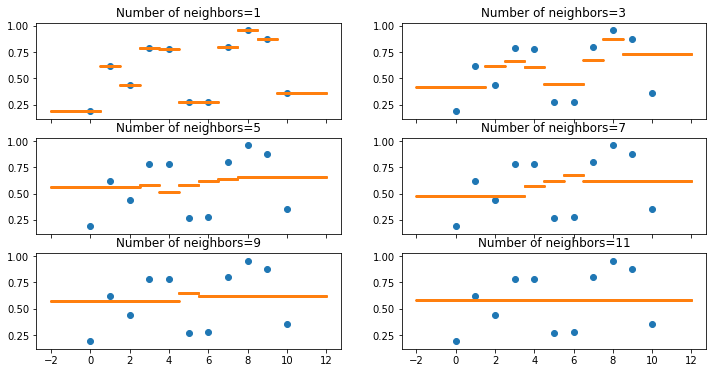

In [10]:
fig, axs = plt.subplots(3, 2, sharex=True, figsize=(12, 6))
for ind in range(6):
    i = int(ind / 2)
    j = ind % 2
    n_neighbors = 2 * ind + 1
    reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X_train, y_train)
    y_test = reg.predict(X_test)
    axs[i, j].scatter(X_train, y_train)
    axs[i, j].scatter(X_test, y_test, s=3)
    axs[i, j].set_title('Number of neighbors=' + str(n_neighbors))

### [예제 9.3] KNN 분류 모델의 결정 경계성

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

iris = load_iris()
X = iris.data[:, :2]
y = iris.target

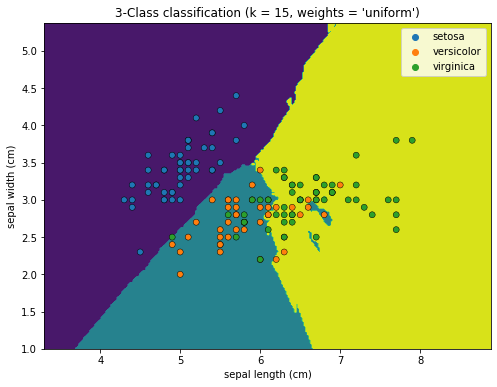

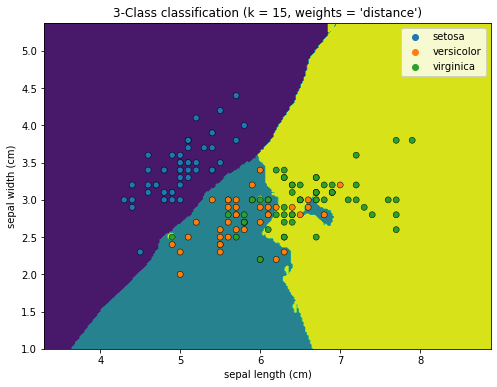

In [12]:
n_neighbors = 15
h = 0.02  # mesh의 단계 크기

for weights in ["uniform", "distance"]:
    clf = KNeighborsClassifier(n_neighbors, weights=weights).fit(X, y)

    # 결정 경계를 meshgrid로 표현
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z)

    # 학습 데이터를 scatter로 표현
    sns.scatterplot(x=X[:, 0],
                    y=X[:, 1],
                    hue=iris.target_names[y],
                    alpha=1.0,
                    edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')" %
              (n_neighbors, weights))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

## 09 되새김 문제

### [되새김 문제 9.1] KNeighborsClassifier 클래스 적용하기

#### 문제

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

X, y = load_iris(return_X_y=True, as_frame=False)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=1234)

#### 풀이

In [14]:
clf = KNeighborsClassifier(n_neighbors=5,
                           weights='distance',
                           metric='manhattan') 
y_pred = clf.fit(X_train,y_train).predict(X_test)

print(f'테스트 데이터셋 기준 정확도:{(y_test == y_pred).mean()*100:.2f}%')

테스트 데이터셋 기준 정확도:98.00%


### [되새김 문제 9.2] KNN 회귀 모델 구현하기

#### 문제

In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes

dic = load_diabetes(as_frame=True)
df = dic['frame'].sample(frac=0.4, random_state=1234)

train, test = df.iloc[:150, :], df.iloc[150:, :]
X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]
X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

#### 풀이

In [16]:
K = 3

preds = []
for i, row_test in X_test.iterrows():
    
    y2 = pd.DataFrame(y_train)
    dist = []
    for i, row_train in X_train.iterrows():
        dist.append(np.sqrt(((row_train - row_test)**2).sum()))
    y2['dist'] = dist
    
    pred = y2.sort_values(by='dist').iloc[:K, 0].values.mean()
    preds.append(pred)
    
preds = pd.Series(preds)

mae = np.abs((y_test.reset_index(drop=True) - preds)).mean()
print(f'테스트 데이터셋 기준 MAE:{mae:.2f}')

테스트 데이터셋 기준 MAE:50.91
